Importing all the required packaes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
%matplotlib inline

In [2]:
matches = pd.read_csv('IPL Matches 2008-2020.csv', encoding = 'latin1' )

deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv', encoding = 'latin1' )

bowlers = pd.read_csv('bowlers.csv',header = 'infer')

# Data Cleaning 

In [3]:
matches['date'] = pd.to_datetime(matches['date'],errors='coerce')

In [4]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [5]:
matches.replace('Brngaluru','Bangalore', inplace = True)

matches.replace({'Deccan Chargers':'Sunrisers Hyderabad','Delhi Daredevils':'Delhi Capitals',
                 'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace = True)


matches.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                     'M.Chinnaswamy Stadium':'M. Chinnaswamy Stadium',              
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},inplace=True)

Replace all the misspelled city, teams, stadium names for better understanding.

In [6]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [7]:
matches.drop('method', inplace = True, axis = 1)

The method coulmn gives us information about how the match was won.

Is it a direct result or based on Duckworth Lewis Method.

This column particulary doesn't help us what we are trying to achieve so drop the method column.

In [8]:
matches['eliminator'].fillna('mode',inplace = True)
matches['winner'].fillna('No-Result',inplace = True)
matches['result_margin'].fillna('No-Result',inplace = True)
matches['result'].fillna('No-Result',inplace = True)
matches['player_of_match'].fillna('No-Result',inplace = True)
matches['city'].fillna('Unknown',inplace = True)

In [9]:
matches['season'] = matches['date'].dt.year

All the columns in our data should have the right data types as this improves the performance of our model and improves the data integrity.

For Example:    
    If a column is having continous value and its datatype is (object) then it is unable to identify the missing values which leads to poor performance of our model. 

In [10]:
deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team             0
dtype: int64

In [11]:
deliveries['dismissal_kind'].fillna('Not-Out',inplace = True)
deliveries['player_dismissed'].fillna('None',inplace = True)
deliveries['extras_type'].fillna('No-Extras',inplace = True)
deliveries['fielder'].fillna('None',inplace = True)

In [12]:
bowlers.isnull().sum()

bowler           0
bowling Hand     0
bowling Type    61
dtype: int64

Handling Missing values or Null values:
    
    If a coulmn is having 5% missing data then the missing data can be dropped but it is not the best practice.
    
    Replace all the missing values with mean, median or mode.
    
    In the precense of outliers use median to replace the missing values than mean.  
    
    If the column is having categorical values replace the missing data  with mode.
    
    In case of missing data removing the entire row is not recommended.
    
    In certain scenarios it is better to impute the missing values by KNN or using a supervised algorithm to predict the missing values

In [13]:
data = matches[['id','season','date']].merge(deliveries, left_on = 'id', right_on = 'id',how = 'left')
data

,id,season,date,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,2008-04-18,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,2008-04-18,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,2008-04-18,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,2008,2008-04-18,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,2008,2008-04-18,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2020,2020-10-11,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians
193464,1237181,2020,2020-10-11,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians
193465,1237181,2020,2020-10-11,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,Not-Out,None,None,wides,Delhi Capitals,Mumbai Indians
193466,1237181,2020,2020-10-11,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians


In [14]:
df = pd.merge(data,bowlers,on = 'bowler', how = 'left')
df.isnull().sum()

id                     0
season                 0
date                   0
inning                 0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
batsman_runs           0
extra_runs             0
total_runs             0
non_boundary           0
is_wicket              0
dismissal_kind         0
player_dismissed       0
fielder                0
extras_type            0
batting_team           0
bowling_team           0
bowling Hand        3335
bowling Type        6713
dtype: int64

In [15]:
IPL = pd.read_csv(r'C:\Users\parva\Downloads\IPL.csv')

In [16]:
IPL.isnull().sum()

id                  0
season              0
date                0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
bowling Hand        0
bowling Type        0
dtype: int64

In [17]:
IPL.replace({'Left Arm Orthodox':'Left Arm Spin',
            'Right Arm Leg Break':'Right Arm Spin',
            'Right Arm Medium':'Right Arm Medium Fast',
            'Right Arm Off Break':'Right Arm Spin',
            'Right Arm Fast':'Right Arm Fast Medium',
            'Left Arm Orthodox/Left Arm Medium Fast':'Left Arm Spin',
            'Right Arm Off Break/Right Arm Leg Break':'Right Arm Spin',
            'Left Arm Medium':'Left Arm Medium Fast',
            'Left Arm Chinaman (Googly)':'Left Arm Spin','Left Arm Fast':'Left Arm Fast Medium'},inplace = True)

IPL.replace({'Right Arm Fast Medium':'Fast','Left Arm Fast Medium':'Fast',
            'Left Arm Spin':'Spin','Right Arm Spin':'Spin',
            'Right Arm Medium Fast':'Medium','Left Arm Medium Fast':'Medium'}, inplace = True)

Simplified the Bowling Type to Fast,Medium Fast and Spin.

# EDA

Binning is done on the balls column where ball 1 and 2 are considered Start of the over

ball 3 and 4 are considered as Middle of the over 

ball 5 and 6 are considered as the End of the over 

any extra balls in the over are considered as Extra.

This is done to identify at what stage of the game there are more wickets are falling and most number of boundaries are being conceded.

In [18]:
labels = ["{0} - {1}".format(ball, ball + 1) for ball in range(1,10,2)]

IPL['balls'] = (pd
                .cut
                (IPL.ball,
                 range (1,12,2),
                 labels = labels,
                 right = False)
               )
IPL

,id,season,date,inning,over,ball,batsman,non_striker,bowler,batsman_runs,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,bowling Hand,bowling Type,balls
0,335982,2008,18/04/2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6
1,335982,2008,18/04/2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Right Handed,Fast,5 - 6
2,335982,2008,18/04/2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2
3,335982,2008,18/04/2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,1 - 2
4,335982,2008,18/04/2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,...,0,Not-Out,None,None,No-Extras,Kolkata Knight Riders,Royal Challengers Bangalore,Left Handed,Fast,3 - 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2020,10/11/2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,...,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians,Right Handed,Fast,5 - 6
193464,1237181,2020,10/11/2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,...,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians,Right Handed,Fast,5 - 6
193465,1237181,2020,10/11/2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,...,0,Not-Out,None,None,wides,Delhi Capitals,Mumbai Indians,Left Handed,Spin,1 - 2
193466,1237181,2020,10/11/2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,...,0,Not-Out,None,None,No-Extras,Delhi Capitals,Mumbai Indians,Left Handed,Spin,1 - 2


In [19]:
bins = [0,2,4,6,10]

labels=['Start','Middle','End','Extra']

IPL['balls_in_over'] = (pd
                        .cut(IPL['ball'], 
                             bins=bins,
                             labels=labels,
                             include_lowest=True)
                       )

In [20]:
IPL.rename(columns= {'id':'match_id',
                    'bowling Hand':'bowler_hand',
                    'bowling Type':'bowler_type'},inplace = True)

Text(0.5, 1.0, 'Distribution of Runs in Second Innings by Bowler Type')

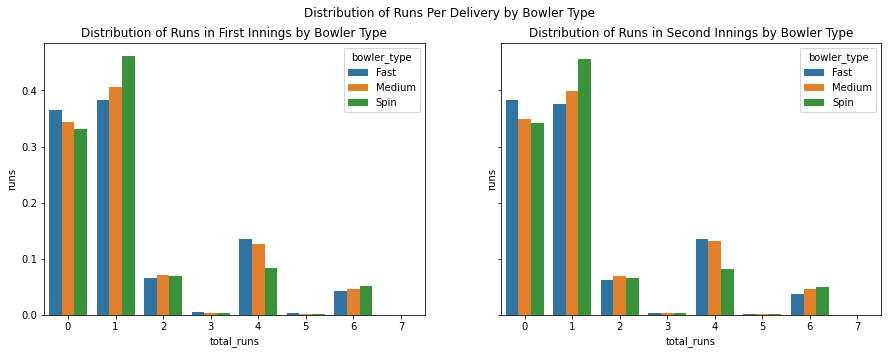

In [21]:
runs_per_bowler_type = (IPL[['inning','total_runs','bowler_type']]
                        .reset_index(drop=True)
                       )

runs = (runs_per_bowler_type
        .groupby(['inning','bowler_type'])
        .total_runs
        .value_counts(normalize = True)
       )

runs.name = 'runs'
runs = runs.reset_index()

runs1 = runs[runs.inning == 1]
runs2 = runs[runs.inning == 2]

f,ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
f.suptitle('Distribution of Runs Per Delivery by Bowler Type')


sns.barplot(ax=ax[0],x = 'total_runs', y = 'runs', hue = 'bowler_type', data =runs1)
ax[0].set_title('Distribution of Runs in First Innings by Bowler Type')

sns.barplot(ax=ax[1],x = 'total_runs', y = 'runs', hue = 'bowler_type', data =runs2)
ax[1].set_title('Distribution of Runs in Second Innings by Bowler Type')


In both the innings of the match spinners are conceding the highest number of singles


The number of two's conceded by the medium fast and spin bowlers in the first innings and second innings is very close but 
there is a fall in the number of two's conceded by the fast bowlers in the second innings compared to the first innings.

The number of three's taken in the first innings is high against the fast bowlers and the spinnes concede least number of three's in the first innings.

In the second innings the fast bowlers are conceding less threes compared to the first innings.

The spin bowlers conceding three's in the second innings is slightly increased but the medium paces are closely related in both the innings.

Spinners concede less boundaries(4) and more sixes(6) in both the innings compared to Medium and Fast paced bowlers but 

<AxesSubplot:>

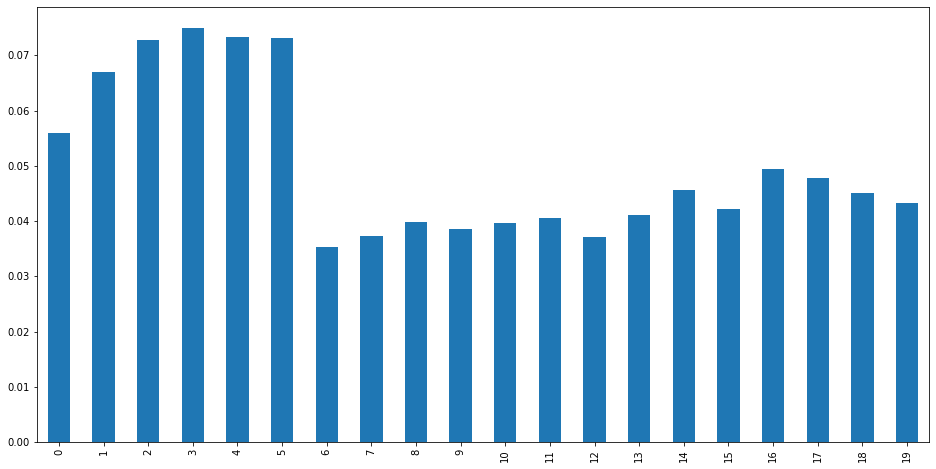

In [22]:
IPL[IPL.batsman_runs == 4].over.value_counts(normalize=True).sort_index().plot.bar(figsize=(16, 8))

The highest number of fours conceded by the bowlers is in the first five overs and powerplay might be the reason
for bowlers conceding more fours in the first five overs.

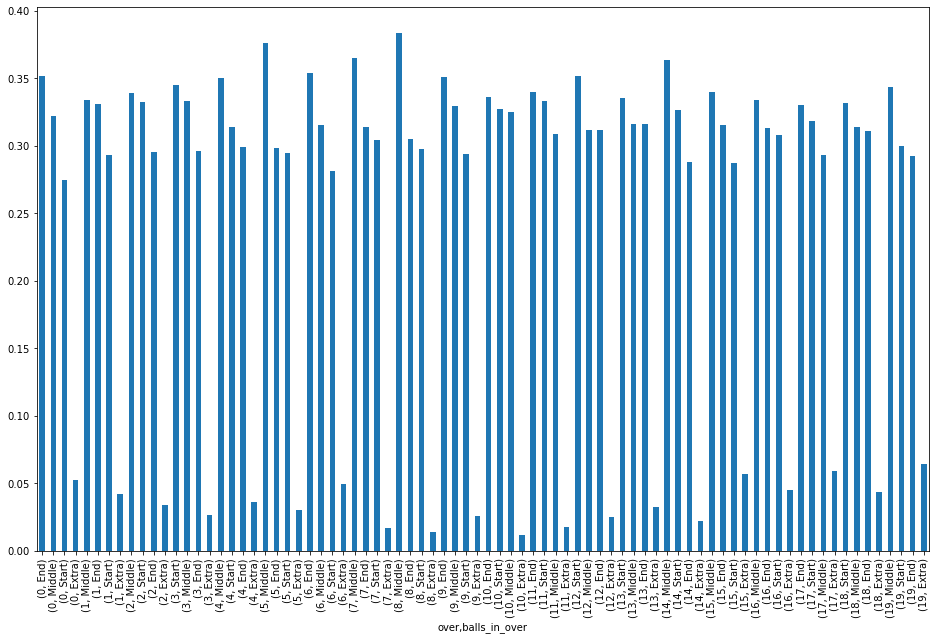

In [23]:
batsman_4 = IPL[(IPL.batsman_runs == 4) & (IPL.inning == 1) ]
batsman_4s = batsman_4.groupby(['over'])['balls_in_over'].value_counts(normalize=True).plot.bar(figsize = (16,10))

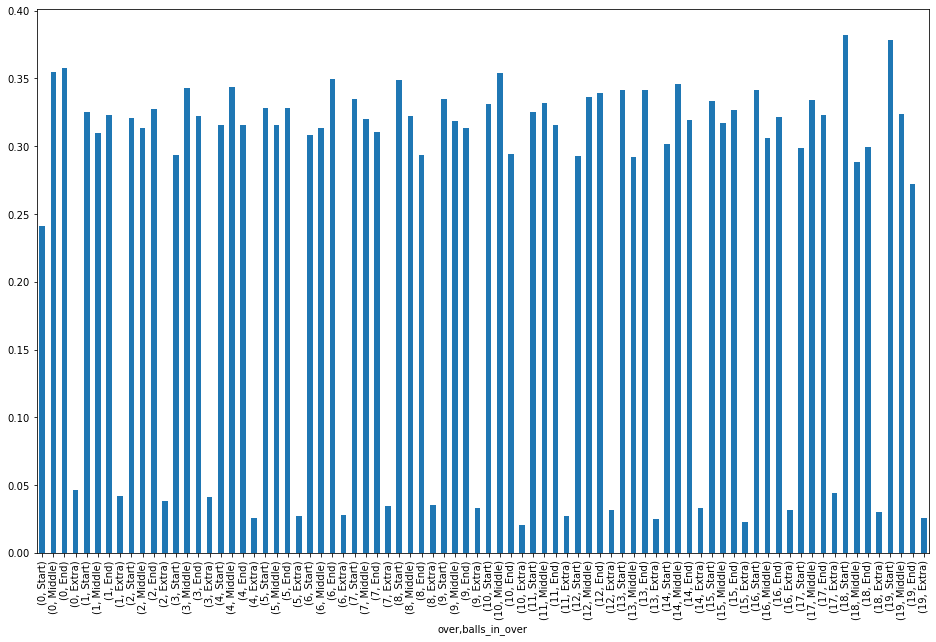

In [24]:
batsman_4s_2 = IPL[(IPL.batsman_runs == 4) & (IPL.inning == 2) ]
batsman_4s_2s = batsman_4s_2.groupby(['over'])['balls_in_over'].value_counts(normalize=True).sort_index().plot.bar(figsize = (16,10))

<AxesSubplot:>

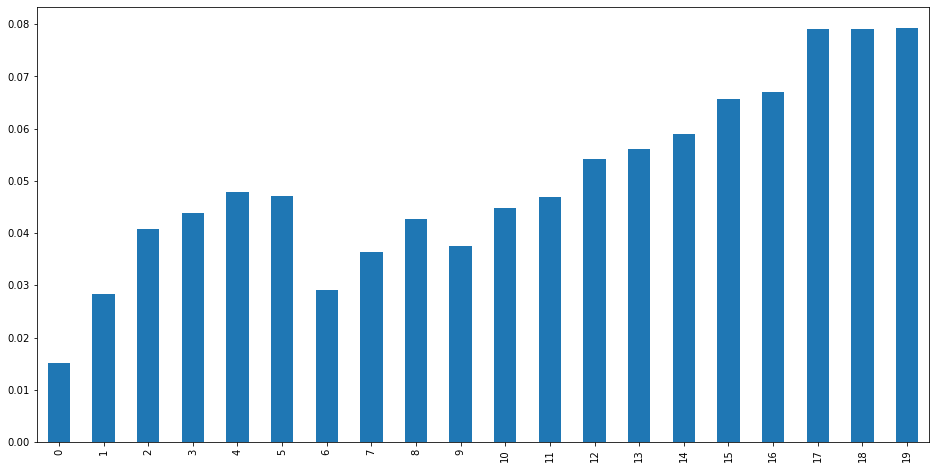

In [25]:
IPL[IPL.batsman_runs == 6].over.value_counts(normalize=True).sort_index().plot.bar(figsize=(16, 8))

Most of the sixes are conceded towards the end of the match this is due to the fact that teams like to maximize their scores during the end overs.

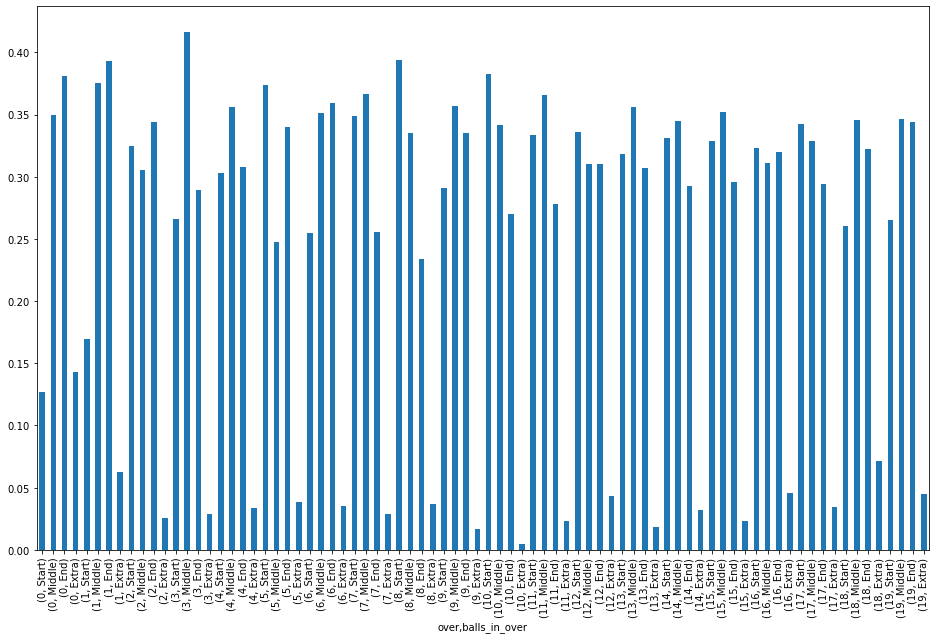

In [26]:
batsman_6 = IPL[(IPL.batsman_runs == 6) & (IPL.inning == 1) ]
batsman6_s = batsman_6.groupby(['over'])['balls_in_over'].value_counts(normalize=True).sort_index().plot.bar(figsize = (16,10))

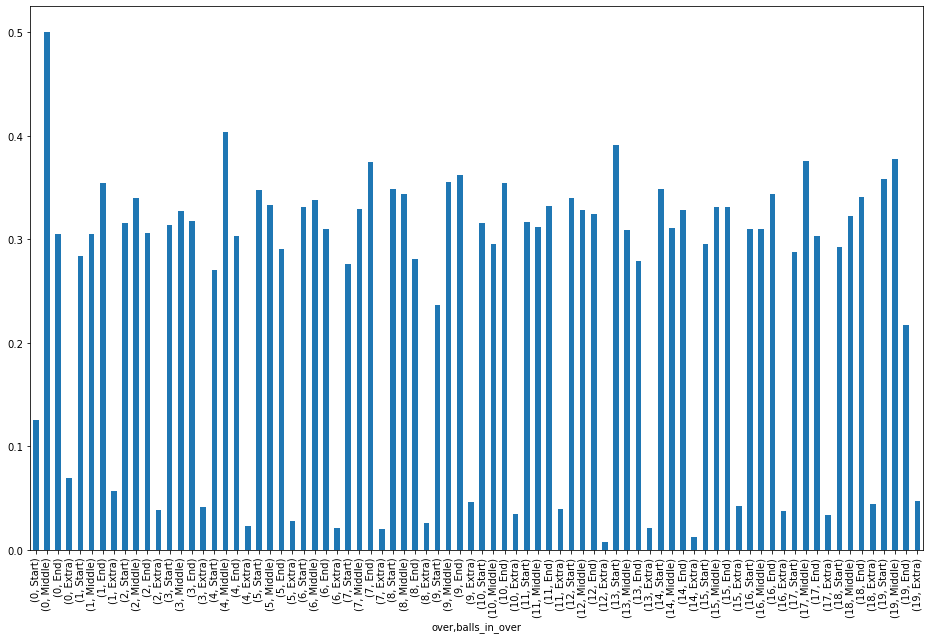

In [27]:
batsman6_6 = IPL[(IPL.batsman_runs == 6) & (IPL.inning == 2) ]
batsman6_2 = batsman6_6.groupby(['over'])['balls_in_over'].value_counts(normalize=True).sort_index().plot.bar(figsize = (16,10))

<AxesSubplot:>

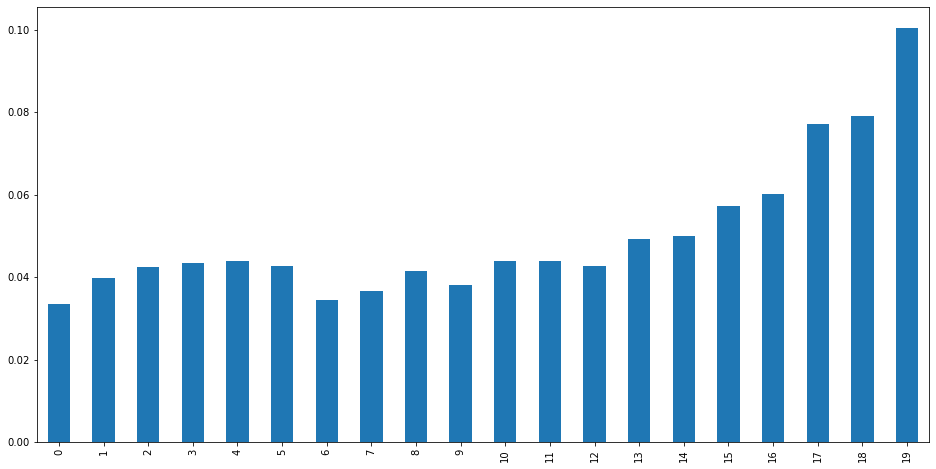

In [28]:
IPL[IPL.is_wicket == 1].over.value_counts(normalize=True).sort_index().plot.bar(figsize=(16, 8))

Most number of wickets are falling towards the end of the innings in  a match

<AxesSubplot:>

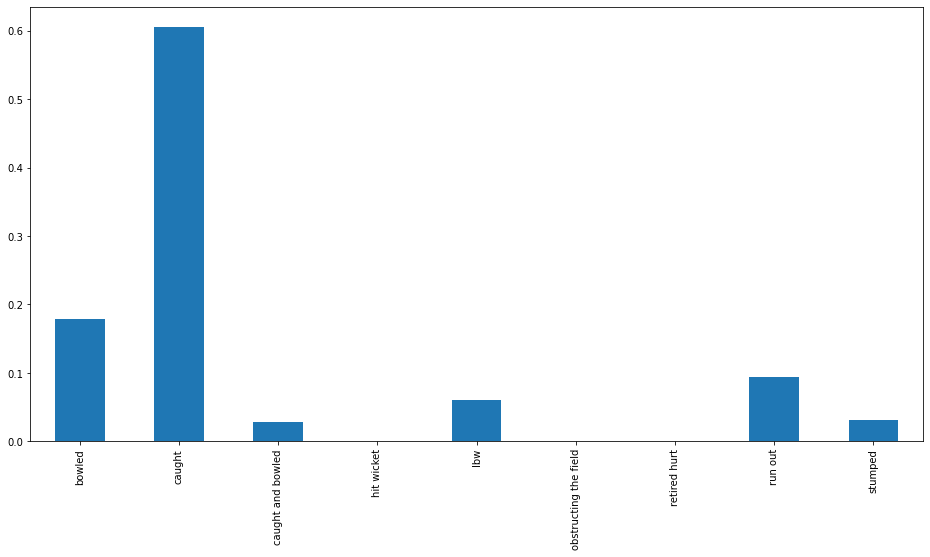

In [29]:
IPL[IPL.is_wicket == 1].dismissal_kind.value_counts(normalize=True).sort_index().plot.bar(figsize=(16, 8))

Most of the dismissals are in the form of catches.

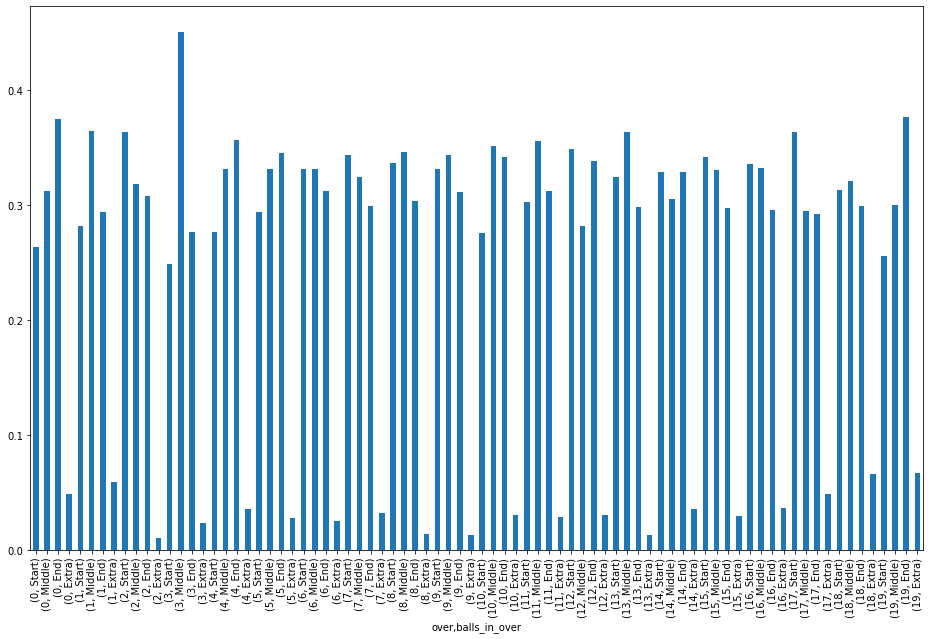

In [30]:
is_wicket_1 = IPL[(IPL.is_wicket == 1) & (IPL.inning == 1) ]
is_wicket1 = is_wicket_1.groupby(['over'])['balls_in_over'].value_counts(normalize=True).sort_index().plot.bar(figsize = (16,10))

In the first innings most wickets fall during Middle of 3rd over in the powerplay.

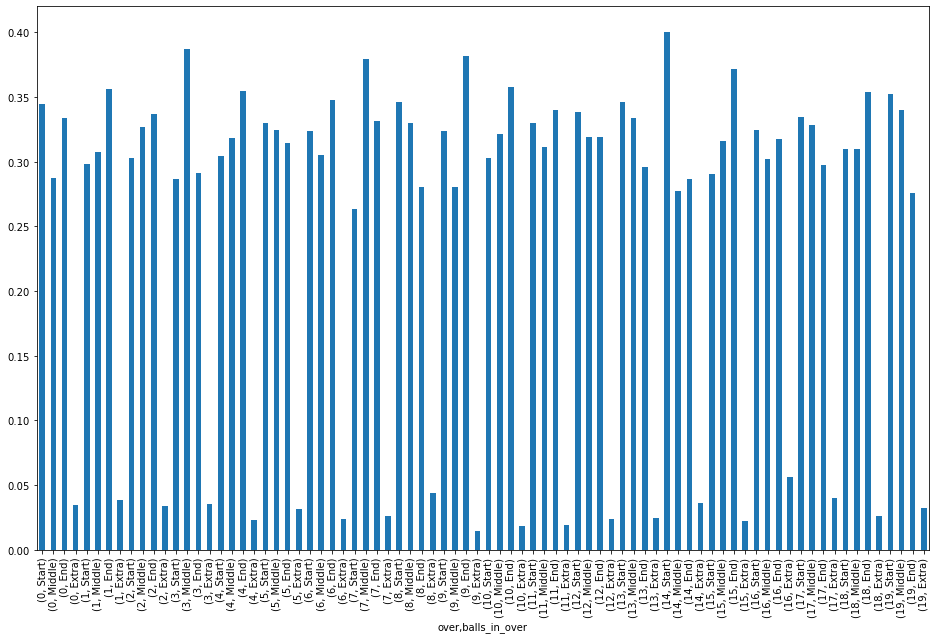

In [31]:
is_wicket_2 = IPL[(IPL.is_wicket == 1) & (IPL.inning == 2) ]
is_wicket2 = is_wicket_2.groupby(['over'])['balls_in_over'].value_counts(normalize=True).sort_index().plot.bar(figsize = (16,10))

In [32]:
uids = ['match_id', 'inning', 'over']
batsman_performance = IPL.sort_values(by=uids).drop_duplicates(uids, keep='first')


batsman_performance['bowler_type_previous'] = batsman_performance.bowler_type.shift(1)
batsman_performance[['match_id', 'inning', 'over', 'bowler_type', 'bowler_type_previous']]

,match_id,inning,over,bowler_type,bowler_type_previous
79,335982,1,0,Medium,NaN
86,335982,1,1,Fast,Medium
92,335982,1,2,Medium,Fast
98,335982,1,3,Fast,Medium
105,335982,1,4,Medium,Fast
...,...,...,...,...,...
193349,1237181,2,14,Medium,Spin
193355,1237181,2,15,Spin,Medium
162944,1237181,2,16,Fast,Spin
193368,1237181,2,17,Fast,Fast


<AxesSubplot:xlabel='combo'>

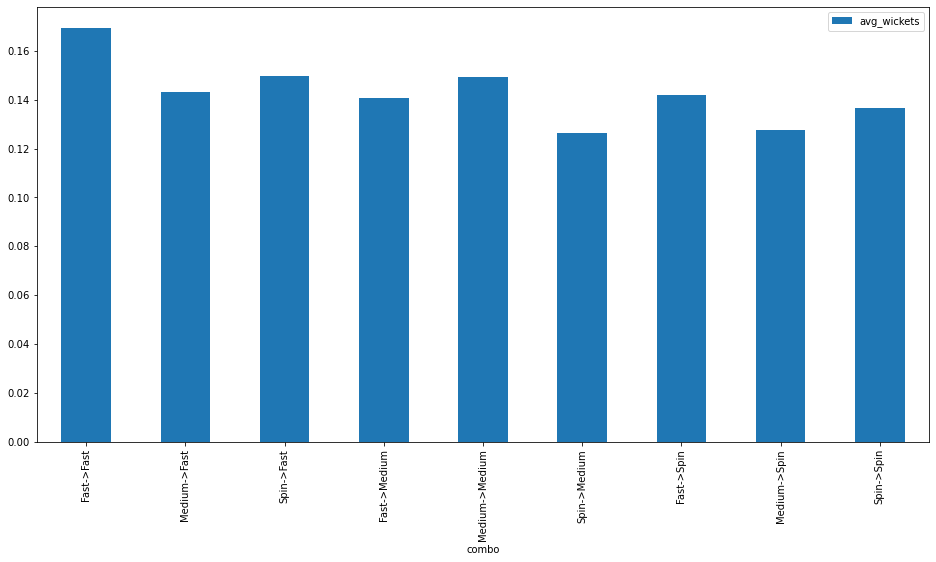

In [33]:
counts = batsman_performance.groupby(['bowler_type', 'bowler_type_previous']).is_wicket.mean()
counts.name = 'avg_wickets'
counts = counts.reset_index()

counts['combo'] = counts.bowler_type_previous + '->' + counts.bowler_type
counts.drop(columns=['bowler_type_previous', 'bowler_type'], inplace=True)

counts.plot.bar(x='combo', y='avg_wickets', figsize=(16, 8))

Does bowling combinations provide us with more wickets in a match?

Form the above bar graph it is identified that using different bowling combinations doesn't tend to have more wickets and they all are closely related.

In [34]:
ipl = IPL.copy(deep = True)

In [35]:
to_drop = ['date','batting_team','bowling_team']
ipl.drop(to_drop, axis = 1, inplace = True )


ipl.isnull().sum()

match_id            0
season              0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
bowler_hand         0
bowler_type         0
balls               0
balls_in_over       0
dtype: int64

# Bowler Overall Career Stats 

Bowler Stats Columns Explained:
    
    overs_bowled: The number of overs bowled by the Bowler in IPL
    economy_rate: Average Runs conceded by a bowler in an over
    wickets_taken: Number of wickets taken by a bowler in his career.
    balls_to_wicket_ratio: The average number of balls required by a bowler to take a wicket
    extras_conceded_per_over: Average number of extra runs conceded by a bowler in an over.
    fours_conceded_per_over:Average number of fours conceded in an over
    sixes_conceded_per_over:Average number of sixes conceded in an over
    
    

In [36]:
bowler_stats = None

for (bowler,bowler_type), bowler_features in ipl.groupby(['bowler','bowler_type']):
        
    row = {
        'bowler': bowler,
        'bowler_type':bowler_type,
        'overs_bowled': (bowler_features.ball.count())/6,
        'economy_rate': (bowler_features.total_runs.sum())/((bowler_features.ball.count())/6),
        'wickets_taken': bowler_features.is_wicket.sum(),
        'balls_to_wicket_ratio':(bowler_features.is_wicket.sum())/((bowler_features.ball.count())/6),
        'extras_conceded_per_over':(bowler_features.extra_runs.sum())/((bowler_features.ball.count())/6),
        'fours_conceded_per_over':(((bowler_features.total_runs == 4).sum())/((bowler_features.ball.count())/6)),
        'sixes_conceded_per_over':(((bowler_features.total_runs == 6).sum())/((bowler_features.ball.count())/6))
        
        
    }
    
    if bowler_stats is None:
        bowler_stats = pd.DataFrame(row, index=[0]) 
    else:
        bowler_stats = bowler_stats.append(row, ignore_index=True)

In [37]:
bowler_stats = bowler_stats.set_index(['bowler','bowler_type'])
bowler_stats

,,overs_bowled,economy_rate,wickets_taken,balls_to_wicket_ratio,extras_conceded_per_over,fours_conceded_per_over,sixes_conceded_per_over
bowler,bowler_type,,,,,,,
A Ashish Reddy,Medium,45.000000,8.888889,19,0.422222,0.311111,0.577778,0.444444
A Chandila,Spin,39.000000,6.282051,11,0.282051,0.076923,0.435897,0.256410
A Choudhary,Medium,18.000000,8.000000,5,0.277778,0.388889,0.722222,0.333333
A Dananjaya,Spin,4.166667,11.280000,0,0.000000,0.240000,0.480000,0.960000
A Flintoff,Fast,11.000000,9.636364,2,0.181818,0.090909,0.636364,0.636364
...,...,...,...,...,...,...,...,...
YA Abdulla,Fast,37.000000,8.405405,15,0.405405,0.459459,0.837838,0.351351
YK Pathan,Spin,197.333333,7.312500,46,0.233108,0.359797,0.501689,0.288851
YS Chahal,Spin,364.666667,7.628885,124,0.340037,0.364717,0.449726,0.370201


In [38]:
bowler_stats.loc['YS Chahal']

,overs_bowled,economy_rate,wickets_taken,balls_to_wicket_ratio,extras_conceded_per_over,fours_conceded_per_over,sixes_conceded_per_over
bowler_type,,,,,,,
Spin,364.666667,7.628885,124,0.340037,0.364717,0.449726,0.370201


This gives information about the overall career statistics about a bowler.

# Bowler Stats Per Individual Season

In [39]:
bowler_stats_per_season = None
for (season,bowler,bowler_type), bowler_features in ipl.groupby(['season','bowler','bowler_type']):
        
    row = {
        'season':season,
        'bowler': bowler,
        'bowler_type':bowler_type,
        'overs_bowled': (bowler_features.ball.count())/6,
        'economy_rate': (bowler_features.total_runs.sum())/((bowler_features.ball.count())/6),
        'wickets_taken': bowler_features.is_wicket.sum(),
        'balls_to_wicket_ratio':(bowler_features.is_wicket.sum())/((bowler_features.ball.count())/6),
        'extras_conceded_per_over':(bowler_features.extra_runs.sum())/((bowler_features.ball.count())/6),
        'fours_conceded_per_over':(((bowler_features.total_runs == 4).sum())/((bowler_features.ball.count())/6)),
        'sixes_conceded_per_over':(((bowler_features.total_runs == 6).sum())/((bowler_features.ball.count())/6))
        
        
    }
    
    if bowler_stats_per_season is None:
        bowler_stats_per_season = pd.DataFrame(row, index=[0]) 
    else:
        bowler_stats_per_season = bowler_stats_per_season.append(row, ignore_index=True)

In [40]:
bowler_stats_per_season = bowler_stats_per_season.set_index(['bowler'])

In [41]:
bowler_stats_per_season.loc['YS Chahal']

,season,bowler_type,overs_bowled,economy_rate,wickets_taken,balls_to_wicket_ratio,extras_conceded_per_over,fours_conceded_per_over,sixes_conceded_per_over
bowler,,,,,,,,,
YS Chahal,2013,Spin,4.000000,8.750000,0,0.000000,0.250000,0.750000,0.250000
YS Chahal,2014,Spin,55.500000,7.009009,12,0.216216,0.162162,0.306306,0.342342
YS Chahal,2015,Spin,47.166667,8.819788,24,0.508834,0.063604,0.445230,0.593640
YS Chahal,2016,Spin,51.333333,7.967532,22,0.428571,0.487013,0.642857,0.292208
YS Chahal,2017,Spin,45.166667,7.771218,14,0.309963,0.664207,0.420664,0.398524
YS Chahal,2018,Spin,52.166667,7.169329,12,0.230032,0.536741,0.498403,0.306709
YS Chahal,2019,Spin,51.333333,7.675325,18,0.350649,0.389610,0.428571,0.428571
YS Chahal,2020,Spin,58.000000,7.137931,22,0.379310,0.293103,0.396552,0.275862


This DataFrame gives information about every single individual season performance of the bowler from 2008-2020  

# Bowler Performances (Avg Ball to Wicket Ratios) In Previous  Seasons

In [42]:
bowler_rolling_per_season = (
    bowler_stats_per_season
    .groupby(['season','bowler','overs_bowled'])
    .balls_to_wicket_ratio
    .sum()
)

bowler_rolling_per_season = bowler_rolling_per_season.reset_index()

X = bowler_rolling_per_season


def rolling_average(data):
    for balls_to_wicket_ratio in range(2,11,2):
        data[f'previous_{balls_to_wicket_ratio}season_balls_to_wicket_ratio'] = (
        data
        .balls_to_wicket_ratio
        .shift(1)
        .rolling(balls_to_wicket_ratio)
        .mean()
    )
    
    return data

bowler_rolling_per_season = pd.DataFrame()
bowler_rolling_per_season = X.groupby(['bowler']).apply(lambda x: rolling_average(x))


bowler_rolling_per_season = bowler_rolling_per_season.set_index(['bowler','season'])

In [43]:
bowler_rolling_per_season.loc['YS Chahal']

,overs_bowled,balls_to_wicket_ratio,previous_2season_balls_to_wicket_ratio,previous_4season_balls_to_wicket_ratio,previous_6season_balls_to_wicket_ratio,previous_8season_balls_to_wicket_ratio,previous_10season_balls_to_wicket_ratio
season,,,,,,,
2013,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2014,55.500000,0.216216,NaN,NaN,NaN,NaN,NaN
2015,47.166667,0.508834,0.108108,NaN,NaN,NaN,NaN
2016,51.333333,0.428571,0.362525,NaN,NaN,NaN,NaN
2017,45.166667,0.309963,0.468703,0.288405,NaN,NaN,NaN
2018,52.166667,0.230032,0.369267,0.365896,NaN,NaN,NaN
2019,51.333333,0.350649,0.269998,0.369350,0.282269,NaN,NaN
2020,58.000000,0.379310,0.290341,0.329804,0.340711,NaN,NaN


Average Balls to Wickets ratio determine how well a bowler is performing in the previous seasons and his wicket taking ability. Based on his performances it is known whether he is a top bowler or not and can further determine the value of the player during auction.

# Bowler Stats Per Match for Every Individual Season

In [44]:
bowler_stats_per_match = None
for (season,match_id,inning,bowler,bowler_type), bowler_features in ipl.groupby(
    ['season','match_id','inning','bowler','bowler_type']
):
        
    row = {
        'season':season,
        'match_id':match_id,
        'inning':inning,
        'bowler': bowler,
        'bowler_type':bowler_type,
        'overs_bowled': (bowler_features.ball.count())/6,
        'economy_rate': (bowler_features.total_runs.sum())/((bowler_features.ball.count())/6),
        'wickets_taken': bowler_features.is_wicket.sum(),
        'balls_to_wicket_ratio':(bowler_features.is_wicket.sum())/((bowler_features.ball.count())/6),
        'extras_conceded_per_over':(bowler_features.extra_runs.sum())/((bowler_features.ball.count())/6),
        'fours_conceded_per_over':(((bowler_features.total_runs == 4).sum())/((bowler_features.ball.count())/6)),
        'sixes_conceded_per_over':(((bowler_features.total_runs == 6).sum())/((bowler_features.ball.count())/6))
        
        
    }
    
    if bowler_stats_per_match is None:
        bowler_stats_per_match = pd.DataFrame(row, index=[0]) 
    else:
        bowler_stats_per_match = bowler_stats_per_match.append(row, ignore_index=True)

In [45]:
bowler_stats_per_match

,season,match_id,inning,bowler,bowler_type,overs_bowled,economy_rate,wickets_taken,balls_to_wicket_ratio,extras_conceded_per_over,fours_conceded_per_over,sixes_conceded_per_over
0,2008,335982,1,AA Noffke,Fast,4.166667,9.840000,1,0.240000,1.440000,0.480000,0.480000
1,2008,335982,1,CL White,Spin,1.166667,20.571429,0,0.000000,1.714286,1.714286,1.714286
2,2008,335982,1,JH Kallis,Fast,4.166667,12.480000,1,0.240000,1.200000,1.440000,0.720000
3,2008,335982,1,P Kumar,Medium,4.166667,9.840000,0,0.000000,0.960000,0.720000,0.720000
4,2008,335982,1,SB Joshi,Spin,3.000000,8.666667,0,0.000000,0.000000,0.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
9662,2020,1237181,2,AR Patel,Spin,4.000000,4.000000,0,0.000000,0.000000,0.250000,0.000000
9663,2020,1237181,2,K Rabada,Fast,3.000000,12.000000,1,0.333333,1.333333,2.000000,0.333333
9664,2020,1237181,2,MP Stoinis,Medium,2.000000,11.500000,1,0.500000,0.000000,0.500000,1.000000
9665,2020,1237181,2,P Dubey,Spin,3.000000,9.666667,0,0.000000,0.000000,0.666667,0.666667


In [46]:
bowler_stats_per_match[(bowler_stats_per_match.bowler == 'YS Chahal') & (bowler_stats_per_match.season == 2020)]

,season,match_id,inning,bowler,bowler_type,overs_bowled,economy_rate,wickets_taken,balls_to_wicket_ratio,extras_conceded_per_over,fours_conceded_per_over,sixes_conceded_per_over
9003,2020,1216494,1,YS Chahal,Spin,4.000000,3.750000,2,0.500000,0.000000,0.250000,0.000000
9060,2020,1216499,2,YS Chahal,Spin,4.000000,9.250000,2,0.500000,0.000000,0.750000,0.500000
9094,2020,1216502,2,YS Chahal,Spin,3.166667,6.000000,2,0.631579,0.000000,0.315789,0.315789
9128,2020,1216505,2,YS Chahal,Spin,4.000000,7.250000,0,0.000000,0.000000,0.500000,0.000000
9182,2020,1216510,1,YS Chahal,Spin,4.000000,6.250000,1,0.250000,0.000000,0.500000,0.000000
9228,2020,1216514,1,YS Chahal,Spin,4.000000,6.250000,3,0.750000,0.250000,0.000000,0.500000
9289,2020,1216519,1,YS Chahal,Spin,3.000000,9.666667,0,0.000000,0.000000,1.000000,0.333333
9322,2020,1216522,1,YS Chahal,Spin,4.500000,7.777778,2,0.444444,0.888889,0.222222,0.222222
9363,2020,1216525,2,YS Chahal,Spin,4.166667,8.400000,1,0.240000,0.240000,0.720000,0.240000
9433,2020,1216531,2,YS Chahal,Spin,3.166667,11.052632,2,0.631579,1.263158,0.947368,0.947368


The Performances of the bowlers across all the matches in an individual season

# Bowler Performance In Matches Within a Season

In [47]:
bowler_performances_per_match_season = bowler_stats_per_match.copy()


bowler_performances_per_match_season = bowler_performances_per_match_season.groupby(
    ['season','match_id','inning','bowler','overs_bowled']).balls_to_wicket_ratio.sum()


bowler_performances_per_match_season = bowler_performances_per_match_season.reset_index()


def rolling_average(data):
    for balls_to_wicket_ratio in range (2,17,2):
        data[f'balls_to_wicket_ratio_{balls_to_wicket_ratio}matches'] = (
        data
            .balls_to_wicket_ratio
            .shift(1)
            .rolling(balls_to_wicket_ratio)
            .mean()
        )
    
    return data
    

X = bowler_performances_per_match_season.copy()

bowler_performances_per_match_season = pd.DataFrame()
bowler_performances_per_match_season = X.groupby(['season','bowler']).apply(lambda x: rolling_average(x))


In [48]:
bowler_performances_per_match_season

,season,match_id,inning,bowler,overs_bowled,balls_to_wicket_ratio,balls_to_wicket_ratio_2matches,balls_to_wicket_ratio_4matches,balls_to_wicket_ratio_6matches,balls_to_wicket_ratio_8matches,balls_to_wicket_ratio_10matches,balls_to_wicket_ratio_12matches,balls_to_wicket_ratio_14matches,balls_to_wicket_ratio_16matches
0,2008,335982,1,AA Noffke,4.166667,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,335982,1,CL White,1.166667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,335982,1,JH Kallis,4.166667,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,335982,1,P Kumar,4.166667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,335982,1,SB Joshi,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,2020,1237181,2,AR Patel,4.000000,0.000000,0.125000,0.250000,0.250000,0.229167,0.233333,0.236111,0.220238,NaN
9663,2020,1237181,2,K Rabada,3.000000,0.333333,0.461538,0.413269,0.400513,0.418440,0.427060,0.395947,0.426526,0.432057
9664,2020,1237181,2,MP Stoinis,2.000000,0.500000,0.973684,0.486842,0.387061,0.320296,0.348545,0.384471,NaN,NaN
9665,2020,1237181,2,P Dubey,3.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This gives us information about the form of the bowler in previous matches within a individual season

# Bowler Economy Rates In each Match Within A Season

In [49]:
bowler_economyrate_per_match_season = bowler_stats_per_match.copy()


bowler_economyrate_per_match_season = bowler_economyrate_per_match_season.groupby(
    ['season','match_id','inning','bowler','overs_bowled']).economy_rate.sum()


bowler_economyrate_per_match_season = bowler_economyrate_per_match_season.reset_index()


def rolling_average(data):
    for economy_rate in range(2,16,2):
        data[f'economy_rate_{economy_rate}matches'] = (
            data
            .economy_rate
            .shift(1)
            .rolling(economy_rate)
            .mean()
        )
    
    return data
    

X = bowler_economyrate_per_match_season.copy()

bowler_economyrate_per_match_season = pd.DataFrame()
bowler_economyrate_per_match_season = X.groupby(['season','bowler']).apply(lambda x: rolling_average(x))


In [50]:
bowler_economyrate_per_match_season[(bowler_economyrate_per_match_season.bowler == 'YS Chahal') 
                                    & (bowler_economyrate_per_match_season.season == 2015)]

,season,match_id,inning,bowler,overs_bowled,economy_rate,economy_rate_2matches,economy_rate_4matches,economy_rate_6matches,economy_rate_8matches,economy_rate_10matches,economy_rate_12matches,economy_rate_14matches
5503,2015,829713,1,YS Chahal,4.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5545,2015,829719,2,YS Chahal,4.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5649,2015,829737,1,YS Chahal,4.166667,6.720000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
5699,2015,829745,1,YS Chahal,4.000000,10.000000,6.860000,NaN,NaN,NaN,NaN,NaN,NaN
5724,2015,829749,1,YS Chahal,3.166667,7.894737,8.360000,7.680000,NaN,NaN,NaN,NaN,NaN
5831,2015,829771,1,YS Chahal,2.000000,11.000000,8.947368,7.903684,NaN,NaN,NaN,NaN,NaN
5878,2015,829779,1,YS Chahal,4.000000,9.000000,9.447368,8.903684,8.269123,NaN,NaN,NaN,NaN
5920,2015,829785,2,YS Chahal,2.666667,9.000000,10.000000,9.473684,8.602456,NaN,NaN,NaN,NaN
5980,2015,829795,2,YS Chahal,4.000000,12.750000,9.000000,9.223684,8.935789,8.451842,NaN,NaN,NaN
6020,2015,829803,1,YS Chahal,2.166667,12.000000,10.875000,10.437500,9.940789,9.170592,NaN,NaN,NaN


Overall Economy Rates of the bowler for every single match

# Batsman Overall Career Statistics Per Bowler Type

Batsmen Overall Career Stats against each bowler_type(fast,medium,spin) 

In [51]:
Z = None

for (batsman,bowler_type), features in ipl.groupby(['batsman','bowler_type']):
    
    row = {
        
        
        'batsman': batsman,
        'overs_played':((features.ball.count())/6),
        'balls_faced': (features.ball.count()),
        'runs_against_bowler_type':(features.total_runs.sum()),
        'fours_against_bowler_type':((features.batsman_runs == 4).sum()),
        'sixes_against_bowler_type':((features.batsman_runs == 6).sum()),
        'outs_against_bowler_type':(features.is_wicket.sum()),
        'runrate_per_delivery':(features.total_runs.sum()/features.ball.count()),
        'bowler_type':bowler_type,
        
        
        
    }
    
    if Z is None:
        Z = pd.DataFrame(row, index=[0]) 
    else:
        Z = Z.append(row, ignore_index=True)

In [52]:
batsman_stats = Z.set_index(['batsman','bowler_type'])
batsman_stats

overs_played  balls_faced  \
batsman        bowler_type                              
A Ashish Reddy Fast            11.500000           69   
               Medium          12.333333           74   
               Spin             8.833333           53   
A Chandila     Fast             0.333333            2   
               Medium           0.833333            5   
...                                  ...          ...   
Yuvraj Singh   Medium         110.333333          662   
               Spin           154.333333          926   
Z Khan         Fast             7.666667           46   
               Medium           9.000000           54   
               Spin             6.833333           41   

                            runs_against_bowler_type  \
batsman        bowler_type                             
A Ashish Reddy Fast                              104   
               Medium                            117   
               Spin                               67   
A Chandila     Fast                                1   
               Medium                              3   
...                                              ...   
Yuvraj Singh   Medium                            906   
               Spin                             1152   
Z Khan         Fast                               44   
               Medium                             58   
               Spin                               19   

                            fours_against_bowler_type  \
batsman        bowler_type                              
A Ashish Reddy Fast                                 7   
               Medium                               7   
               Spin                                 2   
A Chandila     Fast                                 0   
               Medium                               0   
...                                               ...   
Yuvraj Singh   Medium                              67   
               Spin                                75   
Z Khan         Fast                                 4   
               Medium                               6   
               Spin                                 1   

                            sixes_against_bowler_type  \
batsman        bowler_type                              
A Ashish Reddy Fast                                 4   
               Medium                               6   
               Spin                                 5   
A Chandila     Fast                                 0   
               Medium                               0   
...                                               ...   
Yuvraj Singh   Medium                              51   
               Spin                                64   
Z Khan         Fast                                 1   
               Medium                               1   
               Spin                                 0   

                            outs_against_bowler_type  runrate_per_delivery  
batsman        bowler_type                                                  
A Ashish Reddy Fast                                6              1.507246  
               Medium                              8              1.581081  
               Spin                                1              1.264151  
A Chandila     Fast                                0              0.500000  
               Medium                              1              0.600000  
...                                              ...                   ...  
Yuvraj Singh   Medium                             35              1.368580  
               Spin                               34              1.244060  
Z Khan         Fast                                7              0.956522  
               Medium                              3              1.074074  
               Spin                                5              0.463415  

[1448 rows x 7 columns]

In [53]:
batsman_stats.loc['MS Dhoni'].loc['Fast']

overs_played                  162.166667
balls_faced                   973.000000
runs_against_bowler_type     1456.000000
fours_against_bowler_type     107.000000
sixes_against_bowler_type      62.000000
outs_against_bowler_type       48.000000
runrate_per_delivery            1.496403
Name: Fast, dtype: float64

# Batsman Stats in Individual Seasons Against Each Bowler Type

Batsmen Performances against each bowler_type in every single individual seasons from 2008-2020

In [54]:
Z = None

for (season,batsman,bowler_type), features in ipl.groupby(['season','batsman','bowler_type']):
    
    row = {
        
        'season':season,
        'batsman': batsman,
        'overs_played':((features.ball.count())/6),
        'balls_faced': (features.ball.count()),
        'runs_against_bowler_type':(features.total_runs.sum()),
        'fours_against_bowler_type':((features.batsman_runs == 4).sum()),
        'sixes_against_bowler_type':((features.batsman_runs == 6).sum()),
        'outs_against_bowler_type':(features.is_wicket.sum()),
        'runrate_per_delivery':(features.total_runs.sum()/features.ball.count()),
        'bowler_type':bowler_type,
        
        
        
    }
    
    if Z is None:
        Z = pd.DataFrame(row, index=[0]) 
    else:
        Z = Z.append(row, ignore_index=True)

In [55]:
batsman_stats_per_season = Z.set_index(['batsman','season','bowler_type'])
batsman_stats_per_season

overs_played  balls_faced  \
batsman     season bowler_type                              
A Chopra    2008   Fast             3.333333           20   
                   Medium           4.500000           27   
                   Spin             1.333333            8   
A Kumble    2008   Medium           1.166667            7   
                   Spin             1.666667           10   
...                                      ...          ...   
YBK Jaiswal 2020   Fast             1.833333           11   
                   Medium           3.000000           18   
                   Spin             2.500000           15   
YS Chahal   2020   Medium           0.166667            1   
                   Spin             0.666667            4   

                                runs_against_bowler_type  \
batsman     season bowler_type                             
A Chopra    2008   Fast                               12   
                   Medium                             28   
                   Spin                                5   
A Kumble    2008   Medium                              9   
                   Spin                                8   
...                                                  ...   
YBK Jaiswal 2020   Fast                                3   
                   Medium                             24   
                   Spin                               13   
YS Chahal   2020   Medium                              2   
                   Spin                                2   

                                fours_against_bowler_type  \
batsman     season bowler_type                              
A Chopra    2008   Fast                                 1   
                   Medium                               4   
                   Spin                                 0   
A Kumble    2008   Medium                               0   
                   Spin                                 1   
...                                                   ...   
YBK Jaiswal 2020   Fast                                 0   
                   Medium                               1   
                   Spin                                 1   
YS Chahal   2020   Medium                               0   
                   Spin                                 0   

                                sixes_against_bowler_type  \
batsman     season bowler_type                              
A Chopra    2008   Fast                                 0   
                   Medium                               0   
                   Spin                                 0   
A Kumble    2008   Medium                               0   
                   Spin                                 0   
...                                                   ...   
YBK Jaiswal 2020   Fast                                 0   
                   Medium                               2   
                   Spin                                 0   
YS Chahal   2020   Medium                               0   
                   Spin                                 0   

                                outs_against_bowler_type  runrate_per_delivery  
batsman     season bowler_type                                                  
A Chopra    2008   Fast                                1              0.600000  
                   Medium                              2              1.037037  
                   Spin                                1              0.625000  
A Kumble    2008   Medium                              1              1.285714  
                   Spin                                0              0.800000  
...                                                  ...                   ...  
YBK Jaiswal 2020   Fast                                1              0.272727  
                   Medium                              2              1.333333  
                   Spin                                0   

# Batsman Performance  Against Fast Bowlers In Previous Seasons

In [56]:
batsman_performance_per_season_fast = Z[(Z.bowler_type == 'Fast')]


batsman_performance_per_season_fast = (
    batsman_performance_per_season_fast
    .groupby(['batsman','season','overs_played'])
    .runrate_per_delivery
    .sum()
)

batsman_performance_per_season_fast = batsman_performance_per_season_fast.reset_index()


def rolling_average(data):
    for runrate_per_delivery_fast in range (2,14,2):
        data[f'runrate_per_delivery_fast_previous_{runrate_per_delivery_fast}_seasons'] = (
            data
            .runrate_per_delivery
            .shift(1)
            .rolling(runrate_per_delivery_fast)
            .mean()
        )
    return data
    

X = batsman_performance_per_season_fast.copy()
X.head()

batsman_performance_per_season_fast = pd.DataFrame()
batsman_performance_per_season_fast = X.groupby(['batsman']).apply(lambda x: rolling_average(x))
batsman_performance_per_season_fast = batsman_performance_per_season_fast.set_index(['batsman','season','overs_played'])

In [57]:
batsman_performance_per_season_fast.loc['MS Dhoni']

,,runrate_per_delivery,runrate_per_delivery_fast_previous_2_seasons,runrate_per_delivery_fast_previous_4_seasons,runrate_per_delivery_fast_previous_6_seasons,runrate_per_delivery_fast_previous_8_seasons,runrate_per_delivery_fast_previous_10_seasons,runrate_per_delivery_fast_previous_12_seasons
season,overs_played,,,,,,,
2008,17.833333,1.401869,NaN,NaN,NaN,NaN,NaN,NaN
2009,11.333333,1.352941,NaN,NaN,NaN,NaN,NaN,NaN
2010,8.000000,1.541667,1.377405,NaN,NaN,NaN,NaN,NaN
2011,11.000000,1.666667,1.447304,NaN,NaN,NaN,NaN,NaN
2012,14.500000,1.482759,1.604167,1.490786,NaN,NaN,NaN,NaN
2013,16.500000,1.797980,1.574713,1.511008,NaN,NaN,NaN,NaN
2014,12.333333,1.581081,1.640369,1.622268,1.540647,NaN,NaN,NaN
2015,13.166667,1.303797,1.689530,1.632122,1.570516,NaN,NaN,NaN
2016,6.666667,1.700000,1.442439,1.541404,1.562325,1.516095,NaN,NaN


# Batsman Performance Against Spin Bowlers In Previous Seasons

In [58]:
batsman_performance_per_season_spin = Z[(Z.bowler_type == 'Spin')]


batsman_performance_per_season_spin = (batsman_performance_per_season_spin
                                       .groupby(['batsman','season','overs_played'])
                                       .runrate_per_delivery
                                       .sum()
                                      )

batsman_performance_per_season_spin = batsman_performance_per_season_spin.reset_index()


def rolling_average(data):
    for runrate_per_delivery in range (2,14,2):
        data[f'runrate_per_delivery_spin_previous_{runrate_per_delivery}_seasons'] = (
            data
            .runrate_per_delivery
            .shift(1)
            .rolling(runrate_per_delivery)
            .mean()
        )
    
    return data
    

X = batsman_performance_per_season_spin.copy()
X.head()

batsman_performance_per_season_spin = pd.DataFrame()
batsman_performance_per_season_spin = X.groupby(['batsman']).apply(lambda x: rolling_average(x))
batsman_performance_per_season_spin = batsman_performance_per_season_spin.set_index(['batsman','season','overs_played'])

In [59]:
batsman_performance_per_season_spin.loc['MS Dhoni']

,,runrate_per_delivery,runrate_per_delivery_spin_previous_2_seasons,runrate_per_delivery_spin_previous_4_seasons,runrate_per_delivery_spin_previous_6_seasons,runrate_per_delivery_spin_previous_8_seasons,runrate_per_delivery_spin_previous_10_seasons,runrate_per_delivery_spin_previous_12_seasons
season,overs_played,,,,,,,
2008,12.833333,1.298701,NaN,NaN,NaN,NaN,NaN,NaN
2009,23.000000,1.181159,NaN,NaN,NaN,NaN,NaN,NaN
2010,11.500000,0.971014,1.239930,NaN,NaN,NaN,NaN,NaN
2011,17.333333,1.288462,1.076087,NaN,NaN,NaN,NaN,NaN
2012,14.166667,1.188235,1.129738,1.184834,NaN,NaN,NaN,NaN
2013,12.166667,1.000000,1.238348,1.157218,NaN,NaN,NaN,NaN
2014,14.500000,1.160920,1.094118,1.111928,1.154595,NaN,NaN,NaN
2015,16.666667,1.220000,1.080460,1.159404,1.131632,NaN,NaN,NaN
2016,17.500000,1.161905,1.190460,1.142289,1.138105,1.163561,NaN,NaN


# Batsman Performance Against Medium Pace Bowlers in Previous Seasons

In [60]:
batsman_performance_per_season_medium = Z[(Z.bowler_type == 'Medium')]


batsman_performance_per_season_medium = ( batsman_performance_per_season_medium
                                         .groupby(['batsman','season','overs_played'])
                                         .runrate_per_delivery
                                         .sum()
                                        )

batsman_performance_per_season_medium = batsman_performance_per_season_medium.reset_index()


def rolling_average(data):
    for runrate_per_delivery in range (2,14,2):
        data[f'runrate_per_delivery_medium_previous_{runrate_per_delivery}_seasons'] = (
            data
            .runrate_per_delivery
            .shift(1)
            .rolling(runrate_per_delivery)
            .mean()
        )
    
    return data
    

X = batsman_performance_per_season_medium.copy()

batsman_performance_per_season_medium = pd.DataFrame()
batsman_performance_per_season_medium = X.groupby(['batsman']).apply(lambda x: rolling_average(x))
batsman_performance_per_season_medium = batsman_performance_per_season_medium.set_index(['batsman','season','overs_played'])

In [61]:
batsman_performance_per_season_medium.loc['MS Dhoni']

,,runrate_per_delivery,runrate_per_delivery_medium_previous_2_seasons,runrate_per_delivery_medium_previous_4_seasons,runrate_per_delivery_medium_previous_6_seasons,runrate_per_delivery_medium_previous_8_seasons,runrate_per_delivery_medium_previous_10_seasons,runrate_per_delivery_medium_previous_12_seasons
season,overs_played,,,,,,,
2008,22.500000,1.355556,NaN,NaN,NaN,NaN,NaN,NaN
2009,10.666667,1.375000,NaN,NaN,NaN,NaN,NaN,NaN
2010,16.333333,1.622449,1.365278,NaN,NaN,NaN,NaN,NaN
2011,12.833333,1.987013,1.498724,NaN,NaN,NaN,NaN,NaN
2012,18.500000,1.270270,1.804731,1.585004,NaN,NaN,NaN,NaN
2013,21.000000,1.833333,1.628642,1.563683,NaN,NaN,NaN,NaN
2014,16.166667,1.896907,1.551802,1.678266,1.573937,NaN,NaN,NaN
2015,21.666667,1.269231,1.865120,1.746881,1.664162,NaN,NaN,NaN
2016,12.500000,1.506667,1.583069,1.567435,1.646534,1.576220,NaN,NaN


# Batsman Stats Per Match  Against Each Bowler Type

In [62]:
Z = None

for (match_id,batsman,bowler_type), features in ipl.groupby(['match_id','batsman','bowler_type']):
    
    row = {
        
        'match_id':match_id,
        'batsman': batsman,
        'bowler_type':bowler_type,
        'overs_played':((features.ball.count())/6),
        'balls_faced': (features.ball.count()),
        'runs_against_bowler_type':(features.total_runs.sum()),
        'fours_against_bowler_type':((features.batsman_runs == 4).sum()),
        'sixes_against_bowler_type':((features.batsman_runs == 6).sum()),
        'outs_against_bowler_type':(features.is_wicket.sum()),
        'runrate_per_delivery':(features.total_runs.sum()/features.ball.count())
        
        
        
        
    }
    
    if Z is None:
        Z = pd.DataFrame(row, index=[0]) 
    else:
        Z = Z.append(row, ignore_index=True)

In [63]:
batsman_stats_per_match = Z.set_index(['match_id','batsman','bowler_type'])
batsman_stats_per_match

overs_played  balls_faced  \
match_id batsman     bowler_type                              
335982   AA Noffke   Fast             1.333333            8   
                     Medium           0.666667            4   
         B Akhil     Fast             0.333333            2   
         BB McCullum Fast             7.500000           45   
                     Medium           2.833333           17   
...                                        ...          ...   
1237181  SO Hetmyer  Fast             0.166667            1   
                     Spin             0.666667            4   
         SS Iyer     Fast             5.500000           33   
                     Medium           0.500000            3   
                     Spin             2.500000           15   

                                  runs_against_bowler_type  \
match_id batsman     bowler_type                             
335982   AA Noffke   Fast                                4   
                     Medium                              7   
         B Akhil     Fast                                0   
         BB McCullum Fast                               96   
                     Medium                             34   
...                                                    ...   
1237181  SO Hetmyer  Fast                                0   
                     Spin                                5   
         SS Iyer     Fast                               47   
                     Medium                              8   
                     Spin                               12   

                                  fours_against_bowler_type  \
match_id batsman     bowler_type                              
335982   AA Noffke   Fast                                 0   
                     Medium                               1   
         B Akhil     Fast                                 0   
         BB McCullum Fast                                 7   
                     Medium                               2   
...                                                     ...   
1237181  SO Hetmyer  Fast                                 0   
                     Spin                                 1   
         SS Iyer     Fast                                 6   
                     Medium                               0   
                     Spin                                 0   

                                  sixes_against_bowler_type  \
match_id batsman     bowler_type                              
335982   AA Noffke   Fast                                 0   
                     Medium                               0   
         B Akhil     Fast                                 0   
         BB McCullum Fast                                 6   
                     Medium                               3   
...                                                     ...   
1237181  SO Hetmyer  Fast                                 0   
                     Spin                                 0   
         SS Iyer     Fast                                 1   
                     Medium                               1   
                     Spin                                 0   

                                  outs_against_bowler_type  \
match_id batsman     bowler_type                             
335982   AA Noffke   Fast                                0   
                     Medium                              1   
         B Akhil     Fast                                1   
         BB McCullum Fast                                0   
                     Medium                              0   
...                                                    ...   
1237181  SO Hetmyer  Fast                                1   
                     Spin                                0   
         SS Iyer     Fast                                1   
                     Medium                              0   
                     Sp

# Batsman Performance In Every Season and Match Against Fast Bowlers (overs)

In [64]:
batsman_performance_in_match_fast = (ipl.groupby
                                     (['season','match_id','inning','batsman','over','bowler_type'])
                                     .total_runs
                                     .sum()
                                     .reset_index()
                                    )

batsman_performance_in_match_fast = batsman_performance_in_match_fast[batsman_performance_in_match_fast.bowler_type == 'Fast']


batsman_performance_in_match_fast = batsman_performance_in_match_fast.sort_values(by = ['inning','over'])


def rolling_average(data):
    for n_overs in range(2, 19, 2):
        data[f'runs_scored_in_previous_{n_overs}overs_fast'] = (
            data
            .total_runs
            .shift(1)
            .rolling(n_overs)
            .mean()
        )

    return data




X = batsman_performance_in_match_fast.copy()

batsman_performance_in_match_fast = pd.DataFrame()

batsman_performance_in_match_fast = X.groupby(['match_id','batsman']).apply(lambda x: rolling_average(x))
batsman_performance_in_match_fast = batsman_performance_in_match_fast.sort_values(by = ['season','match_id','inning','over'])


In [65]:
batsman_performance_in_match_fast[(batsman_performance_in_match_fast.match_id == 1136589) & 
                                  (batsman_performance_in_match_fast.batsman == 'V Kohli')]

,season,match_id,inning,batsman,over,bowler_type,total_runs,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,runs_scored_in_previous_6overs_fast,runs_scored_in_previous_8overs_fast,runs_scored_in_previous_10overs_fast,runs_scored_in_previous_12overs_fast,runs_scored_in_previous_14overs_fast,runs_scored_in_previous_16overs_fast,runs_scored_in_previous_18overs_fast
53836,2018,1136589,1,V Kohli,9,Fast,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53838,2018,1136589,1,V Kohli,11,Fast,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53840,2018,1136589,1,V Kohli,13,Fast,7,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53842,2018,1136589,1,V Kohli,15,Fast,9,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53844,2018,1136589,1,V Kohli,17,Fast,17,8.0,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53845,2018,1136589,1,V Kohli,18,Fast,2,13.0,9.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53846,2018,1136589,1,V Kohli,19,Fast,9,9.5,8.75,7.166667,NaN,NaN,NaN,NaN,NaN,NaN


# Batsman Performance In Every Season and Match Against Spin Bowlers(overs)

In [66]:
batsman_performance_in_match_spin = (ipl
                                     .groupby(['season','match_id','inning','batsman','over','bowler_type'])
                                     .total_runs
                                     .sum()
                                     .reset_index()
                                    )
batsman_performance_in_match_spin = batsman_performance_in_match_spin[batsman_performance_in_match_spin.bowler_type == 'Spin']
batsman_performance_in_match_spin = batsman_performance_in_match_spin.sort_values(by = ['inning','over'])

def rolling_average(data):
    for n_overs in range(2, 19, 2):
        data[f'runs_scored_in_previous_{n_overs}_overs_spin'] = (
            data
            .total_runs
            .shift(1)
            .rolling(n_overs)
            .mean()
            )
    
    return data


X = batsman_performance_in_match_spin.copy()

batsman_performance_in_match_spin = pd.DataFrame()

batsman_performance_in_match_spin = X.groupby(['match_id','batsman']).apply(lambda x: rolling_average(x))
batsman_performance_in_match_spin = batsman_performance_in_match_spin.sort_values(by = ['season','match_id','inning','over'])


In [67]:
batsman_performance_in_match_spin[(batsman_performance_in_match_spin.match_id == 1136589) &
                                 (batsman_performance_in_match_spin.batsman == 'V Kohli')]

,season,match_id,inning,batsman,over,bowler_type,total_runs,runs_scored_in_previous_2_overs_spin,runs_scored_in_previous_4_overs_spin,runs_scored_in_previous_6_overs_spin,runs_scored_in_previous_8_overs_spin,runs_scored_in_previous_10_overs_spin,runs_scored_in_previous_12_overs_spin,runs_scored_in_previous_14_overs_spin,runs_scored_in_previous_16_overs_spin,runs_scored_in_previous_18_overs_spin
53835,2018,1136589,1,V Kohli,8,Spin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53837,2018,1136589,1,V Kohli,10,Spin,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53839,2018,1136589,1,V Kohli,12,Spin,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53841,2018,1136589,1,V Kohli,14,Spin,9,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53843,2018,1136589,1,V Kohli,16,Spin,2,5.5,3.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Batsman Performance In Every Season and Match Aginst Medium Fast Bowlers(overs)

In [68]:
batsman_performance_in_match_medium = (ipl
                                       .groupby(['season','match_id','inning','batsman','over','bowler_type'])
                                       .total_runs.sum()
                                       .reset_index()
                                      )
batsman_performance_in_match_medium = batsman_performance_in_match_medium[batsman_performance_in_match_medium.bowler_type == 'Medium']
batsman_performance_in_match_medium = batsman_performance_in_match_medium.sort_values(by = ['inning','over'])


def rolling_average(data):
    for n_overs in range(2, 19, 2):
        data[f'runs_scored_in_previous_{n_overs}_overs_medium'] = (
            data
            .total_runs.shift(1)
            .rolling(n_overs)
            .mean()
        )
    
    return data


X = batsman_performance_in_match_medium.copy()

batsman_performance_in_match_medium = pd.DataFrame()

batsman_performance_in_match_medium = X.groupby(['match_id','batsman']).apply(lambda x: rolling_average(x))
batsman_performance_in_match_medium = batsman_performance_in_match_medium.sort_values(by = ['season','match_id','inning','over'])


In [69]:
batsman_performance_in_match_medium[(batsman_performance_in_match_medium.match_id == 1136589)]

,season,match_id,inning,batsman,over,bowler_type,total_runs,runs_scored_in_previous_2_overs_medium,runs_scored_in_previous_4_overs_medium,runs_scored_in_previous_6_overs_medium,runs_scored_in_previous_8_overs_medium,runs_scored_in_previous_10_overs_medium,runs_scored_in_previous_12_overs_medium,runs_scored_in_previous_14_overs_medium,runs_scored_in_previous_16_overs_medium,runs_scored_in_previous_18_overs_medium
53848,2018,1136589,2,CA Lynn,0,Medium,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53879,2018,1136589,2,SP Narine,0,Medium,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53881,2018,1136589,2,SP Narine,2,Medium,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53853,2018,1136589,2,CA Lynn,6,Medium,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53884,2018,1136589,2,SP Narine,6,Medium,3,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53855,2018,1136589,2,CA Lynn,8,Medium,2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53874,2018,1136589,2,RV Uthappa,8,Medium,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53861,2018,1136589,2,CA Lynn,14,Medium,2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53870,2018,1136589,2,N Rana,14,Medium,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53847,2018,1136589,2,AD Russell,16,Medium,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
result1 = batsman_performance_in_match_fast.append(batsman_performance_in_match_medium,ignore_index = True)

result1 = result1.append(batsman_performance_in_match_spin,ignore_index = True)

result1 

,season,match_id,inning,batsman,over,bowler_type,total_runs,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,runs_scored_in_previous_6overs_fast,...,runs_scored_in_previous_18_overs_medium,runs_scored_in_previous_2_overs_spin,runs_scored_in_previous_4_overs_spin,runs_scored_in_previous_6_overs_spin,runs_scored_in_previous_8_overs_spin,runs_scored_in_previous_10_overs_spin,runs_scored_in_previous_12_overs_spin,runs_scored_in_previous_14_overs_spin,runs_scored_in_previous_16_overs_spin,runs_scored_in_previous_18_overs_spin
0,2008,335982,1,BB McCullum,1,Fast,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,335982,1,BB McCullum,3,Fast,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,335982,1,SC Ganguly,3,Fast,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,335982,1,BB McCullum,5,Fast,1,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,335982,1,RT Ponting,5,Fast,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66256,2020,1237181,2,RG Sharma,12,Spin,6,NaN,NaN,NaN,...,NaN,3.5,5.25,4.000000,4.125,NaN,NaN,NaN,NaN,NaN
66257,2020,1237181,2,Ishan Kishan,13,Spin,2,NaN,NaN,NaN,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66258,2020,1237181,2,RG Sharma,13,Spin,2,NaN,NaN,NaN,...,NaN,3.5,6.50,4.833333,4.000,NaN,NaN,NaN,NaN,NaN
66259,2020,1237181,2,Ishan Kishan,15,Spin,9,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The result1 DataFrame consists of batsman and his performances against fast,medium and spin bowlers in an inning of a match

In [71]:
model = ipl.groupby(['batsman','match_id','inning','over']).total_runs.sum().reset_index()
   
model

,batsman,match_id,inning,over,total_runs
0,A Ashish Reddy,548346,1,13,7
1,A Ashish Reddy,548346,1,14,3
2,A Ashish Reddy,548346,1,15,0
3,A Ashish Reddy,548352,2,18,1
4,A Ashish Reddy,548352,2,19,2
...,...,...,...,...,...
66234,Z Khan,1082635,2,10,0
66235,Z Khan,1082635,2,11,1
66236,Z Khan,1082635,2,12,1
66237,Z Khan,1082635,2,13,0


In [72]:
X = pd.DataFrame(columns = ['batsman','match_id','inning','over_total_runs'])


In [73]:
for i, (group_collection,ipl_subset)in enumerate(model.groupby(['batsman','match_id','inning'])):
    for i in range(1,20,1):
        ipl_subset = ipl_subset.sort_values(by = 'over', ascending = True)
        ipl_subset = ipl_subset.rename(columns = {'total_runs':'over_total_runs'})
        ipl_subset[f'over_total_runs-{i}'] = ipl_subset.over_total_runs.shift(1)
    
    X = X.append(ipl_subset)

In [74]:
X

,batsman,match_id,inning,over_total_runs,over,over_total_runs-1,over_total_runs-2,over_total_runs-3,over_total_runs-4,over_total_runs-5,...,over_total_runs-10,over_total_runs-11,over_total_runs-12,over_total_runs-13,over_total_runs-14,over_total_runs-15,over_total_runs-16,over_total_runs-17,over_total_runs-18,over_total_runs-19
0,A Ashish Reddy,548346,1,7,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Ashish Reddy,548346,1,3,14.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,A Ashish Reddy,548346,1,0,15.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,A Ashish Reddy,548352,2,1,18.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A Ashish Reddy,548352,2,2,19.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66234,Z Khan,1082635,2,0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66235,Z Khan,1082635,2,1,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66236,Z Khan,1082635,2,1,12.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
66237,Z Khan,1082635,2,0,13.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The DataFrame X consists of the runs that batsmen has scored in all the overs in an inning in a match

In [75]:
X1 = X.copy(deep=True)
X1

,batsman,match_id,inning,over_total_runs,over,over_total_runs-1,over_total_runs-2,over_total_runs-3,over_total_runs-4,over_total_runs-5,...,over_total_runs-10,over_total_runs-11,over_total_runs-12,over_total_runs-13,over_total_runs-14,over_total_runs-15,over_total_runs-16,over_total_runs-17,over_total_runs-18,over_total_runs-19
0,A Ashish Reddy,548346,1,7,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Ashish Reddy,548346,1,3,14.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,A Ashish Reddy,548346,1,0,15.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,A Ashish Reddy,548352,2,1,18.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A Ashish Reddy,548352,2,2,19.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66234,Z Khan,1082635,2,0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66235,Z Khan,1082635,2,1,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66236,Z Khan,1082635,2,1,12.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
66237,Z Khan,1082635,2,0,13.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [76]:
features = None

for (match_id,batsman,inning,over,bowler,bowler_type), stats in ipl.groupby(['match_id','batsman','inning','over','bowler','bowler_type']):
        
    row = {
        'match_id':match_id,
        'batsman':batsman,
        'inning':inning,
        'over':over,
        'bowler': bowler,
        'bowler_type':bowler_type,
        'batsman_average_runs_per_delivery':(stats.batsman_runs.sum()/stats.ball.count())
        
    }
    
    if features is None:
        features = pd.DataFrame(row, index=[0]) 
    else:
        features = features.append(row, ignore_index=True)
        

In [77]:
features

,match_id,batsman,inning,over,bowler,bowler_type,batsman_average_runs_per_delivery
0,335982,AA Noffke,2,8,AB Agarkar,Fast,0.250000
1,335982,AA Noffke,2,9,SC Ganguly,Medium,2.000000
2,335982,AA Noffke,2,10,AB Agarkar,Fast,0.250000
3,335982,AA Noffke,2,11,SC Ganguly,Medium,1.000000
4,335982,B Akhil,2,8,AB Agarkar,Fast,0.000000
...,...,...,...,...,...,...,...
66265,1237181,SS Iyer,1,15,J Yadav,Spin,1.000000
66266,1237181,SS Iyer,1,16,JJ Bumrah,Fast,1.833333
66267,1237181,SS Iyer,1,17,TA Boult,Fast,1.000000
66268,1237181,SS Iyer,1,18,JJ Bumrah,Fast,0.500000


In [78]:
X1.rename(columns = {'over_total_runs':'batsman_total_runs'},inplace = True)

In [79]:
Z = features.copy()

In [80]:
result = pd.merge(result1,X1,how = 'left',on = ['match_id','batsman','inning','over'])
result

,season,match_id,inning,batsman,over,bowler_type,total_runs,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,runs_scored_in_previous_6overs_fast,...,over_total_runs-10,over_total_runs-11,over_total_runs-12,over_total_runs-13,over_total_runs-14,over_total_runs-15,over_total_runs-16,over_total_runs-17,over_total_runs-18,over_total_runs-19
0,2008,335982,1,BB McCullum,1,Fast,18,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2008,335982,1,BB McCullum,3,Fast,18,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,2008,335982,1,SC Ganguly,3,Fast,5,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2008,335982,1,BB McCullum,5,Fast,1,18.0,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,2008,335982,1,RT Ponting,5,Fast,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66256,2020,1237181,2,RG Sharma,12,Spin,6,NaN,NaN,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
66257,2020,1237181,2,Ishan Kishan,13,Spin,2,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
66258,2020,1237181,2,RG Sharma,13,Spin,2,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
66259,2020,1237181,2,Ishan Kishan,15,Spin,9,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [81]:
result.drop('total_runs', axis = 1, inplace = True)

In [82]:
result = pd.merge(Z,result,how = 'left',on = ['match_id','batsman','inning','over','bowler_type'])

In [83]:
result 

,match_id,batsman,inning,over,bowler,bowler_type,batsman_average_runs_per_delivery,season,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,...,over_total_runs-10,over_total_runs-11,over_total_runs-12,over_total_runs-13,over_total_runs-14,over_total_runs-15,over_total_runs-16,over_total_runs-17,over_total_runs-18,over_total_runs-19
0,335982,AA Noffke,2,8,AB Agarkar,Fast,0.250000,2008,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,AA Noffke,2,9,SC Ganguly,Medium,2.000000,2008,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,335982,AA Noffke,2,10,AB Agarkar,Fast,0.250000,2008,NaN,NaN,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
3,335982,AA Noffke,2,11,SC Ganguly,Medium,1.000000,2008,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,335982,B Akhil,2,8,AB Agarkar,Fast,0.000000,2008,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66265,1237181,SS Iyer,1,15,J Yadav,Spin,1.000000,2020,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
66266,1237181,SS Iyer,1,16,JJ Bumrah,Fast,1.833333,2020,1.5,3.00,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
66267,1237181,SS Iyer,1,17,TA Boult,Fast,1.000000,2020,6.0,4.50,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
66268,1237181,SS Iyer,1,18,JJ Bumrah,Fast,0.500000,2020,6.0,3.75,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [84]:
def rolling_average(data):
    
    data['bowler_type_previous'] = data.bowler_type.shift(1)
    
    
    
    return data

X = result.copy(deep = True)


result = pd.DataFrame()

result = X.groupby(['batsman','match_id']).apply(lambda x: rolling_average(x))


result

,match_id,batsman,inning,over,bowler,bowler_type,batsman_average_runs_per_delivery,season,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,...,over_total_runs-11,over_total_runs-12,over_total_runs-13,over_total_runs-14,over_total_runs-15,over_total_runs-16,over_total_runs-17,over_total_runs-18,over_total_runs-19,bowler_type_previous
0,335982,AA Noffke,2,8,AB Agarkar,Fast,0.250000,2008,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,AA Noffke,2,9,SC Ganguly,Medium,2.000000,2008,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Fast
2,335982,AA Noffke,2,10,AB Agarkar,Fast,0.250000,2008,NaN,NaN,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,Medium
3,335982,AA Noffke,2,11,SC Ganguly,Medium,1.000000,2008,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast
4,335982,B Akhil,2,8,AB Agarkar,Fast,0.000000,2008,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66265,1237181,SS Iyer,1,15,J Yadav,Spin,1.000000,2020,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast
66266,1237181,SS Iyer,1,16,JJ Bumrah,Fast,1.833333,2020,1.5,3.00,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Spin
66267,1237181,SS Iyer,1,17,TA Boult,Fast,1.000000,2020,6.0,4.50,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,Fast
66268,1237181,SS Iyer,1,18,JJ Bumrah,Fast,0.500000,2020,6.0,3.75,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast


In [85]:
result.drop('batsman_average_runs_per_delivery',axis = 1, inplace = True)
result

,match_id,batsman,inning,over,bowler,bowler_type,season,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,runs_scored_in_previous_6overs_fast,...,over_total_runs-11,over_total_runs-12,over_total_runs-13,over_total_runs-14,over_total_runs-15,over_total_runs-16,over_total_runs-17,over_total_runs-18,over_total_runs-19,bowler_type_previous
0,335982,AA Noffke,2,8,AB Agarkar,Fast,2008,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,AA Noffke,2,9,SC Ganguly,Medium,2008,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Fast
2,335982,AA Noffke,2,10,AB Agarkar,Fast,2008,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,Medium
3,335982,AA Noffke,2,11,SC Ganguly,Medium,2008,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast
4,335982,B Akhil,2,8,AB Agarkar,Fast,2008,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66265,1237181,SS Iyer,1,15,J Yadav,Spin,2020,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast
66266,1237181,SS Iyer,1,16,JJ Bumrah,Fast,2020,1.5,3.00,4.166667,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Spin
66267,1237181,SS Iyer,1,17,TA Boult,Fast,2020,6.0,4.50,5.333333,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,Fast
66268,1237181,SS Iyer,1,18,JJ Bumrah,Fast,2020,6.0,3.75,4.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast


The result dataFrame is a combination of the batsman performance against each bowler type and the number of runs scored in each over of the match.

In [86]:
X = result.copy(deep=True)
X

,match_id,batsman,inning,over,bowler,bowler_type,season,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,runs_scored_in_previous_6overs_fast,...,over_total_runs-11,over_total_runs-12,over_total_runs-13,over_total_runs-14,over_total_runs-15,over_total_runs-16,over_total_runs-17,over_total_runs-18,over_total_runs-19,bowler_type_previous
0,335982,AA Noffke,2,8,AB Agarkar,Fast,2008,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,AA Noffke,2,9,SC Ganguly,Medium,2008,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Fast
2,335982,AA Noffke,2,10,AB Agarkar,Fast,2008,NaN,NaN,NaN,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,Medium
3,335982,AA Noffke,2,11,SC Ganguly,Medium,2008,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast
4,335982,B Akhil,2,8,AB Agarkar,Fast,2008,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66265,1237181,SS Iyer,1,15,J Yadav,Spin,2020,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast
66266,1237181,SS Iyer,1,16,JJ Bumrah,Fast,2020,1.5,3.00,4.166667,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Spin
66267,1237181,SS Iyer,1,17,TA Boult,Fast,2020,6.0,4.50,5.333333,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,Fast
66268,1237181,SS Iyer,1,18,JJ Bumrah,Fast,2020,6.0,3.75,4.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Fast


In [87]:
X = X.set_index(['season','match_id','inning','over','batsman','bowler','batsman_total_runs'])
X = pd.get_dummies(X)
X.reset_index(inplace = True)
X = X.set_index(['season','match_id','inning','over','batsman','bowler'])
X

batsman_total_runs  \
season match_id inning over batsman   bowler                                
2008   335982   2      8    AA Noffke AB Agarkar                        3   
                       9    AA Noffke SC Ganguly                        6   
                       10   AA Noffke AB Agarkar                        1   
                       11   AA Noffke SC Ganguly                        1   
                       8    B Akhil   AB Agarkar                        0   
...                                                                   ...   
2020   1237181  1      15   SS Iyer   J Yadav                           2   
                       16   SS Iyer   JJ Bumrah                        11   
                       17   SS Iyer   TA Boult                          1   
                       18   SS Iyer   JJ Bumrah                         2   
                       19   SS Iyer   NM Coulter-Nile                   8   

                                                       runs_scored_in_previous_2overs_fast  \
season match_id inning over batsman   bowler                                                 
2008   335982   2      8    AA Noffke AB Agarkar                                       NaN   
                       9    AA Noffke SC Ganguly                                       NaN   
                       10   AA Noffke AB Agarkar                                       NaN   
                       11   AA Noffke SC Ganguly                                       NaN   
                       8    B Akhil   AB Agarkar                                       NaN   
...                                                                                    ...   
2020   1237181  1      15   SS Iyer   J Yadav                                          NaN   
                       16   SS Iyer   JJ Bumrah                                        1.5   
                       17   SS Iyer   TA Boult                                         6.0   
                       18   SS Iyer   JJ Bumrah                                        6.0   
                       19   SS Iyer   NM Coulter-Nile                                  1.5   

                                                       runs_scored_in_previous_4overs_fast  \
season match_id inning over batsman   bowler                                                 
2008   335982   2      8    AA Noffke AB Agarkar                                       NaN   
                       9    AA Noffke SC Ganguly                                       NaN   
                       10   AA Noffke AB Agarkar                                       NaN   
                       11   AA Noffke SC Ganguly                                       NaN   
                       8    B Akhil   AB Agarkar                                       NaN   
...                                                                                    ...   
2020   1237181  1      15   SS Iyer   J Yadav                                          NaN   
                       16   SS Iyer   JJ Bumrah                                       3.00   
                       17   SS Iyer   TA Boult                                        4.50   
                       18   SS Iyer   JJ Bumrah                                       3.75   
                       19   SS Iyer   NM Coulter-Nile                                 3.75   

                                                       runs_scored_in_previous_6overs_fast  \
season match_id inning over batsman   bowler                                                 
2008   335982   2      8    AA Noffke AB Agarkar                                       NaN   
                       9    AA Noffke SC Ganguly                                       NaN   
                       10   AA Noffke AB Agarkar                                       NaN   
                       11   AA Noffke SC Ganguly                                       NaN   
                       8    B Akhil   AB Ag

# Model

In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [89]:
import xgboost

y = X.pop('batsman_total_runs')

model = xgboost.XGBRegressor()
model.fit(X,y)

y_hat = pd.Series(model.predict(X))

y_hat.name = 'predictions'



In [90]:
output = X.merge(y,left_index = True,right_index = True)

In [91]:
output = output.reset_index()

In [92]:
output = output.merge(y_hat,left_index = True,right_index = True)

In [93]:
output

,season,match_id,inning,over,batsman,bowler,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,runs_scored_in_previous_6overs_fast,runs_scored_in_previous_8overs_fast,...,over_total_runs-18,over_total_runs-19,bowler_type_Fast,bowler_type_Medium,bowler_type_Spin,bowler_type_previous_Fast,bowler_type_previous_Medium,bowler_type_previous_Spin,batsman_total_runs,predictions
0,2008,335982,2,8,AA Noffke,AB Agarkar,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,0,0,0,0,3,2.618335
1,2008,335982,2,9,AA Noffke,SC Ganguly,NaN,NaN,NaN,NaN,...,3.0,3.0,0,1,0,1,0,0,6,4.477927
2,2008,335982,2,10,AA Noffke,AB Agarkar,NaN,NaN,NaN,NaN,...,6.0,6.0,1,0,0,0,1,0,1,4.141444
3,2008,335982,2,11,AA Noffke,SC Ganguly,NaN,NaN,NaN,NaN,...,1.0,1.0,0,1,0,1,0,0,1,4.332621
4,2008,335982,2,8,B Akhil,AB Agarkar,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,0,0,0,0,0,2.618335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66265,2020,1237181,1,15,SS Iyer,J Yadav,NaN,NaN,NaN,NaN,...,1.0,1.0,0,0,1,1,0,0,2,4.013604
66266,2020,1237181,1,16,SS Iyer,JJ Bumrah,1.5,3.00,4.166667,NaN,...,2.0,2.0,1,0,0,0,0,1,11,6.153566
66267,2020,1237181,1,17,SS Iyer,TA Boult,6.0,4.50,5.333333,NaN,...,11.0,11.0,1,0,0,1,0,0,1,2.633255
66268,2020,1237181,1,18,SS Iyer,JJ Bumrah,6.0,3.75,4.000000,4.625,...,1.0,1.0,1,0,0,1,0,0,2,4.089485


Binning is done on the batsmen_total_runs to know the state of the batsmen 

In [94]:
bins = [0,5,9,36]
labels=['Defensive','Moderate','Offensive']
output['state_of_batsman'] = pd.cut(output['batsman_total_runs'], bins=bins, labels=labels, include_lowest=True)
output

,season,match_id,inning,over,batsman,bowler,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,runs_scored_in_previous_6overs_fast,runs_scored_in_previous_8overs_fast,...,over_total_runs-19,bowler_type_Fast,bowler_type_Medium,bowler_type_Spin,bowler_type_previous_Fast,bowler_type_previous_Medium,bowler_type_previous_Spin,batsman_total_runs,predictions,state_of_batsman
0,2008,335982,2,8,AA Noffke,AB Agarkar,NaN,NaN,NaN,NaN,...,NaN,1,0,0,0,0,0,3,2.618335,Defensive
1,2008,335982,2,9,AA Noffke,SC Ganguly,NaN,NaN,NaN,NaN,...,3.0,0,1,0,1,0,0,6,4.477927,Moderate
2,2008,335982,2,10,AA Noffke,AB Agarkar,NaN,NaN,NaN,NaN,...,6.0,1,0,0,0,1,0,1,4.141444,Defensive
3,2008,335982,2,11,AA Noffke,SC Ganguly,NaN,NaN,NaN,NaN,...,1.0,0,1,0,1,0,0,1,4.332621,Defensive
4,2008,335982,2,8,B Akhil,AB Agarkar,NaN,NaN,NaN,NaN,...,NaN,1,0,0,0,0,0,0,2.618335,Defensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66265,2020,1237181,1,15,SS Iyer,J Yadav,NaN,NaN,NaN,NaN,...,1.0,0,0,1,1,0,0,2,4.013604,Defensive
66266,2020,1237181,1,16,SS Iyer,JJ Bumrah,1.5,3.00,4.166667,NaN,...,2.0,1,0,0,0,0,1,11,6.153566,Offensive
66267,2020,1237181,1,17,SS Iyer,TA Boult,6.0,4.50,5.333333,NaN,...,11.0,1,0,0,1,0,0,1,2.633255,Defensive
66268,2020,1237181,1,18,SS Iyer,JJ Bumrah,6.0,3.75,4.000000,4.625,...,1.0,1,0,0,1,0,0,2,4.089485,Defensive


Binning is done on the over column to know the state of the match whether it is a powerplay or middle overs or end overs of the match

In [95]:
bins = [0,5,13,19]
labels=['Powerplay','Middle Overs','End']
output['state_of_match'] = pd.cut(output['over'], bins=bins, labels=labels, include_lowest=True)
output

,season,match_id,inning,over,batsman,bowler,runs_scored_in_previous_2overs_fast,runs_scored_in_previous_4overs_fast,runs_scored_in_previous_6overs_fast,runs_scored_in_previous_8overs_fast,...,bowler_type_Fast,bowler_type_Medium,bowler_type_Spin,bowler_type_previous_Fast,bowler_type_previous_Medium,bowler_type_previous_Spin,batsman_total_runs,predictions,state_of_batsman,state_of_match
0,2008,335982,2,8,AA Noffke,AB Agarkar,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,3,2.618335,Defensive,Middle Overs
1,2008,335982,2,9,AA Noffke,SC Ganguly,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,6,4.477927,Moderate,Middle Overs
2,2008,335982,2,10,AA Noffke,AB Agarkar,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,1,4.141444,Defensive,Middle Overs
3,2008,335982,2,11,AA Noffke,SC Ganguly,NaN,NaN,NaN,NaN,...,0,1,0,1,0,0,1,4.332621,Defensive,Middle Overs
4,2008,335982,2,8,B Akhil,AB Agarkar,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,2.618335,Defensive,Middle Overs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66265,2020,1237181,1,15,SS Iyer,J Yadav,NaN,NaN,NaN,NaN,...,0,0,1,1,0,0,2,4.013604,Defensive,End
66266,2020,1237181,1,16,SS Iyer,JJ Bumrah,1.5,3.00,4.166667,NaN,...,1,0,0,0,0,1,11,6.153566,Offensive,End
66267,2020,1237181,1,17,SS Iyer,TA Boult,6.0,4.50,5.333333,NaN,...,1,0,0,1,0,0,1,2.633255,Defensive,End
66268,2020,1237181,1,18,SS Iyer,JJ Bumrah,6.0,3.75,4.000000,4.625,...,1,0,0,1,0,0,2,4.089485,Defensive,End


In [96]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, y_hat))
print('MSE:', metrics.mean_squared_error(y, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_hat)))


MAE: 2.740837745562531
MSE: 12.935023398886912
RMSE: 3.5965293546538604


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [98]:
model = xgboost.XGBRegressor(booster='gbtree',normalize = True)

In [99]:
model.fit(X_train,y_train)

[17:23:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "normalize" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, normalize=True, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [100]:
predictions = model.predict(X_test)

In [101]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 2.839854795696162
MSE: 14.079593324248787
RMSE: 3.752278417741518


What if the batsmen facing a bowler_type(fast) for any over(ex- over 1 of the match) faces a different bowler_type(medium or spin)

would the runs scored be different? 

How would that have effected the outcome of the match?

# To be continued...